In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rec_df = pd.read_csv('rec-with-percentage-no-dup.csv')
reading_df = pd.read_csv('readings.csv')

In [19]:
rec_df.describe()

,user_id,reading_id,relative_difficulty,unknown_count,unique_word_count,total_count,flesch_kincaid
count,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000
mean,119.000000,3.000000,0.016539,2.798565,146.717274,19.589958,76.811757
std,69.013382,2.000598,0.020256,3.738548,60.876568,15.391088,21.545750
min,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,60.310000
25%,59.000000,1.000000,0.000000,0.000000,77.000000,9.000000,61.220000
50%,119.000000,3.000000,0.011834,1.000000,169.000000,18.000000,67.150000
75%,179.000000,5.000000,0.025000,4.000000,206.000000,27.000000,89.750000
max,238.000000,6.000000,0.213592,44.000000,211.000000,85.000000,124.400000


In [18]:
reading_df.describe()

,lexile,flesch_kincaid
count,7.000000,7.000000
mean,721.428571,76.755714
std,384.726248,23.227492
min,100.000000,60.310000
25%,540.000000,62.965000
50%,740.000000,67.150000
75%,915.000000,79.750000
max,1300.000000,124.400000


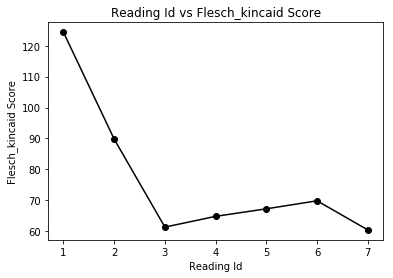

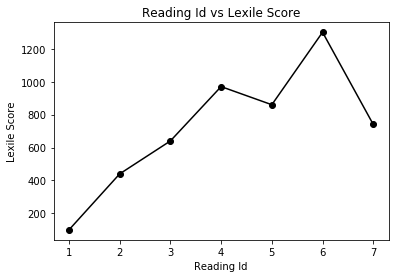

In [33]:
index = range(1,8)
plt.plot(index, reading_df['flesch_kincaid'], '-ok')
plt.xlabel('Reading Id')
plt.ylabel('Flesch_kincaid Score')
plt.title('Reading Id vs Flesch_kincaid Score')
plt.show()
plt.plot(index, reading_df['lexile'], '-ok')
plt.xlabel('Reading Id')
plt.ylabel('Lexile Score')
plt.title('Reading Id vs Lexile Score')
plt.show()

(239, 8)


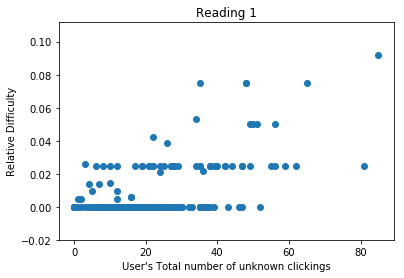

(239, 8)


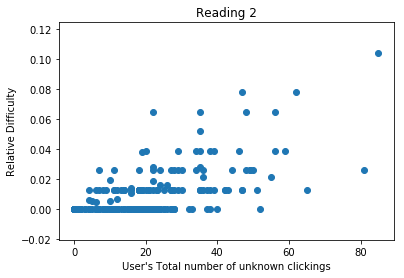

(239, 8)


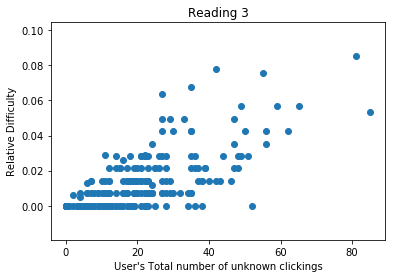

(239, 8)


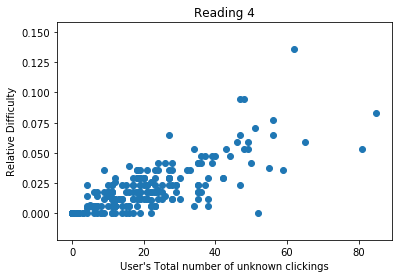

(239, 8)


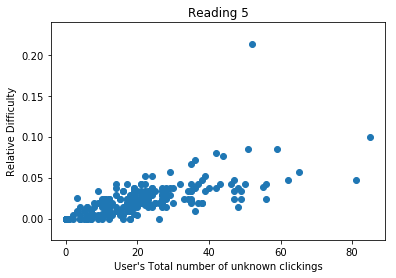

(239, 8)


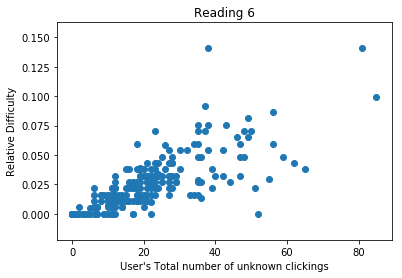

(239, 8)


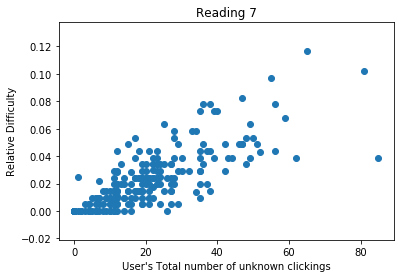

In [12]:
for i in range(7):
    A = rec_df.loc[(rec_df['reading_id'] == i)]
    print(A.shape)
#     A = A.sort_values('relative_difficulty').reset_index(drop=True)

    plt.scatter(A['total_count'], A['relative_difficulty'])
    plt.title('Reading ' + str(i + 1))
    plt.xlabel('User\'s Total number of unknown clickings')
    plt.ylabel('Relative Difficulty')
    plt.show()

### box plot, rd vs rid

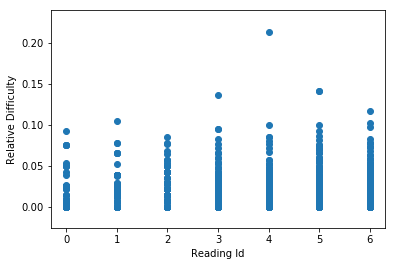

In [36]:
plt.scatter(rec_df['reading_id'], rec_df['relative_difficulty'])
plt.xlabel('Reading Id')
plt.ylabel('Relative Difficulty')
plt.show()
# print(tabulate(df[[0,1,2,3]].reset_index(drop=True), headers='keys', tablefmt='psql'))

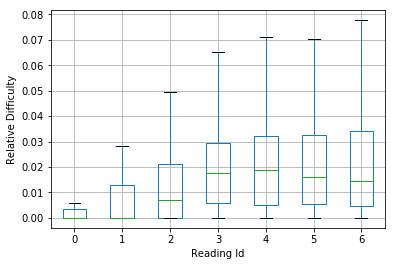

In [14]:
arr = []
for i in range(238):
    A = rec_df.loc[(rec_df['user_id'] == i)].reset_index(drop=True)
    arr.append(A['relative_difficulty'])
df = pd.DataFrame(arr, columns=range(7))
df.boxplot(showfliers=False)
plt.xlabel('Reading Id')
plt.ylabel('Relative Difficulty')
plt.show()
# print(tabulate(df[[0,1,2,3]].reset_index(drop=True), headers='keys', tablefmt='psql'))

In [110]:
from tabulate import tabulate
measures = []
for i in range(7):
    mean = df.iloc[:,i].mean()
    maxi = df.iloc[:,i].max()
    mini = df.iloc[:,i].min()
    measures.append([i, mean])
df = pd.DataFrame([[val[0], "{0:.2f}%".format(val[1] * 100)] for val in measures], columns=['reading', 'mean'])
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-----------+--------+
|    |   reading | mean   |
|----+-----------+--------|
|  0 |         0 | 0.73%  |
|  1 |         1 | 0.97%  |
|  2 |         2 | 1.26%  |
|  3 |         3 | 1.94%  |
|  4 |         4 | 2.17%  |
|  5 |         5 | 2.33%  |
|  6 |         6 | 2.18%  |
+----+-----------+--------+


## Important- all users' relative difficulty on all readings

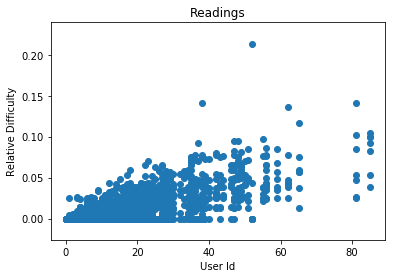

In [15]:
A = rec_df.sort_values('relative_difficulty').reset_index(drop=True)
# A.head()

plt.scatter(A['total_count'], A['relative_difficulty'])
plt.title('Readings')
plt.xlabel('User Id')
plt.ylabel('Relative Difficulty')
plt.show()

In [32]:
data = rec_df
features = ['flesch_kincaid', 'total_count']
target = 'relative_difficulty'
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression()
for i in range(1,3) :
    rfe = RFE(reg, i)
    rfe = rfe.fit(data[features], data[target])
    filtered = data[features][data[features].columns[rfe.support_]].columns
    X_train, X_test, y_train, y_test = train_test_split(data[filtered], data[target], test_size=0.3, random_state=0)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    print('Accuracy of regression classifier on train set: '+ str(i) +': {:.2f}'.format(reg.score(X_train, y_train)))
    y_pred = reg.predict(X_test)
    print('Accuracy of regression classifier on test set:'+ str(i) +' {:.2f}'.format(reg.score(X_test, y_test)))

Accuracy of regression classifier on train set: 1: 0.45
Accuracy of regression classifier on test set:1 0.45
Accuracy of regression classifier on train set: 2: 0.51
Accuracy of regression classifier on test set:2 0.51


4


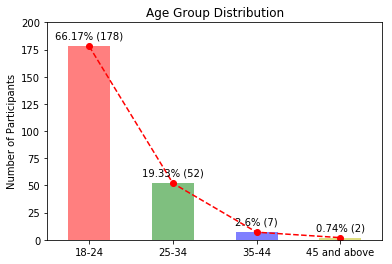

In [56]:
user_df = pd.read_csv('user_basic_info.csv')
user_df.describe()
age_df = user_df.groupby('age')['user_id'].nunique()
age_df.head()

counts = [178, 52, 7, 2]

total = age_df.count()
x_pos = [1, 3, 5, 7]
color = ['r', 'g', 'b', 'y']
fig, ax = plt.subplots()
plt.bar(x_pos, counts, align='center', alpha=0.5, width=1, color=color)

ax.set_xticks(x_pos)
ax.set_xticklabels(['18-24', '25-34', '35-44', '45 and above'])
plt.ylabel('Number of Participants')
plt.xlim( (0, 8) )
plt.ylim( (0, 200) )
plt.title('Age Group Distribution')
rects = ax.patches
x = []
y = []
print(total)
for rect, count in zip(rects, counts):
    height = rect.get_height()
    count = str(round(count/269 * 100, 2)) + '% (' + str(count) + ')'
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, count, ha='center', va='bottom')
    x.append(rect.get_x() + 0.5)
    y.append(height)
plt.plot(x, y, linestyle="dashed", marker="o", color="red")
plt.show()

In [58]:
edu_df = user_df.groupby('grade')['user_id'].nunique()
edu_df

grade
bachelor            157
doctor                2
high_school_grad      9
in_college           38
in_high_school        2
master               29
skill_school          2
Name: user_id, dtype: int64

4


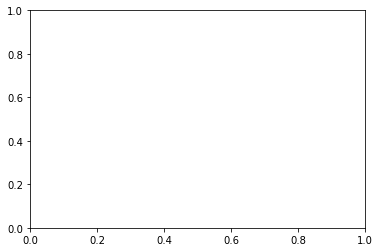

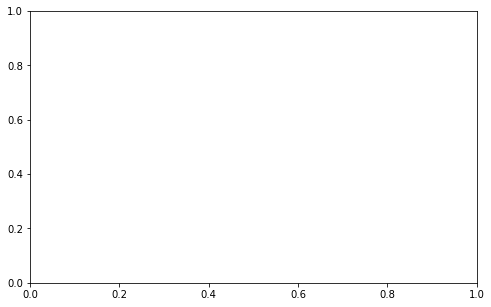

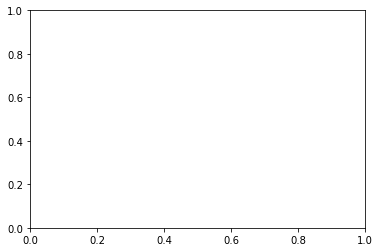

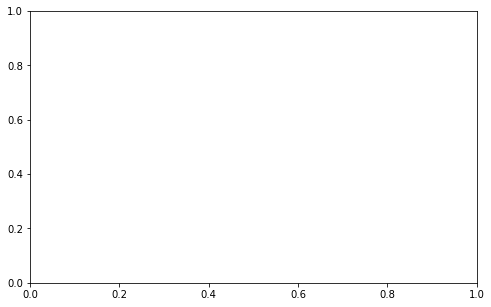

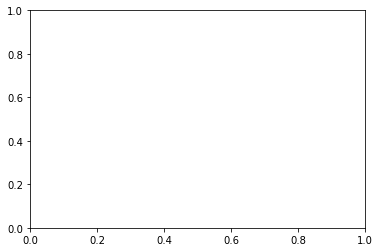

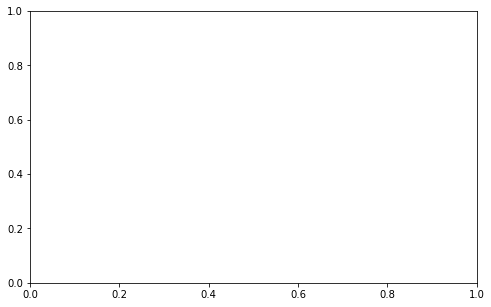

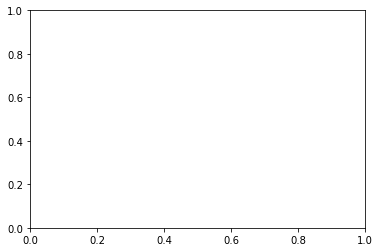

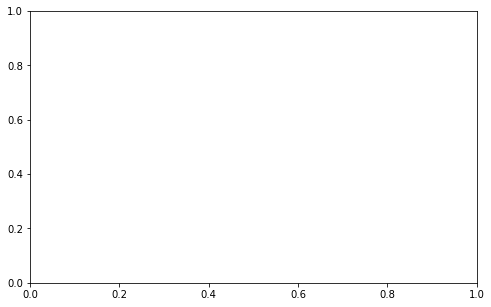

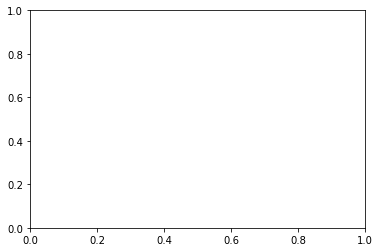

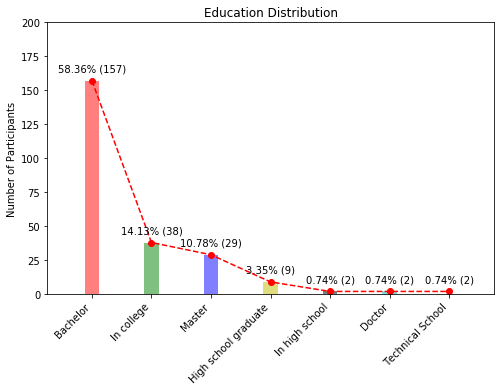

In [75]:
counts = [157, 38, 29, 9, 2, 2, 2]

total = age_df.count()
x_pos = [3, 7, 11, 15, 19, 23, 27]
color = ['r', 'g', 'b', 'y', 'k', 'c', 'w']
fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(x_pos, counts, align='center', alpha=0.5, width=1, color=color)

ax.set_xticks(x_pos)
ax.set_xticklabels(['Bachelor', 'In college', 'Master', 'High school graduate', 'In high school', 'Doctor', 'Technical School'], rotation = 45, ha="right")
plt.ylabel('Number of Participants')
plt.xlim( (0, 30) )
plt.ylim( (0, 200) )
plt.title('Education Distribution')
rects = ax.patches
x = []
y = []
print(total)
for rect, count in zip(rects, counts):
    height = rect.get_height()
    count = str(round(count/269 * 100, 2)) + '% (' + str(count) + ')'
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, count, ha='center', va='bottom')
    x.append(rect.get_x() + 0.5)
    y.append(height)
plt.plot(x, y, linestyle="dashed", marker="o", color="red")
plt.show()

In [130]:
user_reading_df = pd.read_csv('user_reading_time.csv')
user_ids = user_reading_df.user_id.unique()
rids = user_reading_df.reading_id.unique()
user_reading_df['time_length'] = user_reading_df['time_length'] / 60 / 100
print(user_reading_df['time_length'])

0         0.921667
1         7.627167
2        14.456667
3        15.055333
4        80.163333
5        37.877667
6       105.071167
7         1.196667
8         4.215667
9        22.510167
10       15.853167
11       46.439167
12       24.600833
13       38.147833
14        4.754833
15       11.483000
16        7.800667
17       55.923000
18       68.899000
19       28.741000
20       52.460167
21        1.329167
22        5.879000
23       23.958000
24       17.625833
25       24.074500
26       27.748000
27       57.528667
28        2.878333
29        3.223833
           ...    
1643     19.361333
1644     22.318667
1645      9.004833
1646     35.601000
1647    138.222000
1648      1.559500
1649      4.676833
1650      5.481833
1651      3.408667
1652      8.509500
1653     35.287167
1654     24.230833
1655     22.344833
1656     25.881167
1657     13.247667
1658     20.998833
1659     36.250833
1660     38.304167
1661     25.253333
1662      9.711667
1663     34.270667
1664     17.

In [132]:
for rid in rids:
    A = user_reading_df.loc[(user_reading_df['reading_id'] == rid)].reset_index(drop=True)
    A['time_length'].sort_values()
    plt.scatter(A['time_length'], range(238))
    plt.xlabel('Reading Id')
    plt.ylabel('Relative Difficulty')
    plt.show()

ValueError: x and y must be the same size